**Mounting Drive**

This line imports the drive module from the google.colab package. The drive module provides functions for interacting with Google Drive from within a Colab notebook.

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The imutils library is a set of convenience functions for common computer vision and image processing tasks in OpenCV.
It provides a convenient set of tools to streamline various aspects of working with images and video frames.



 **Installing required libraries**




In [ ]:
pip install imutils

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.4/107.7 GB disk)


**Install YOLOv8**

YOLO, short for "You Only Look Once," is a popular real-time object detection system in computer vision. It's an algorithm that can detect and locate multiple objects in an image or a video frame, providing both the class labels and the bounding box coordinates for the detected objects.

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


Testing the YOLO Model with an online image.

****

In [ ]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

100% 6.23M/6.23M [00:00<00:00, 53.8MB/s]

2023-11-06 12:27:21.301399: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 12:27:23.013792: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 476k/476k [00:00<00:00, 11.7MB/s]
image 1/1 /content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 422.3ms
Speed: 3.1ms pre-process, 422.3ms inference, 36.5ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
%cd /content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)

/content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)


In [ ]:
!ls

bus.jpg    README.dataset.txt	test   valid	   yolov8s.pt
data.yaml  README.roboflow.txt	train  yolov8n.pt


**Custom Training YOLO Model**

In [ ]:
%cd /content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=1 imgsz=224 plots=True

/content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=1, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fals

In [ ]:
!ls '/content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)/runs/detect/train'

args.yaml					    results.csv		   val_batch1_labels.jpg
confusion_matrix.png				    results.png		   val_batch1_pred.jpg
events.out.tfevents.1699273675.6c01a9127cc8.4476.0  train_batch0.jpg	   val_batch2_labels.jpg
F1_curve.png					    train_batch1.jpg	   val_batch2_pred.jpg
P_curve.png					    train_batch2.jpg	   weights
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg


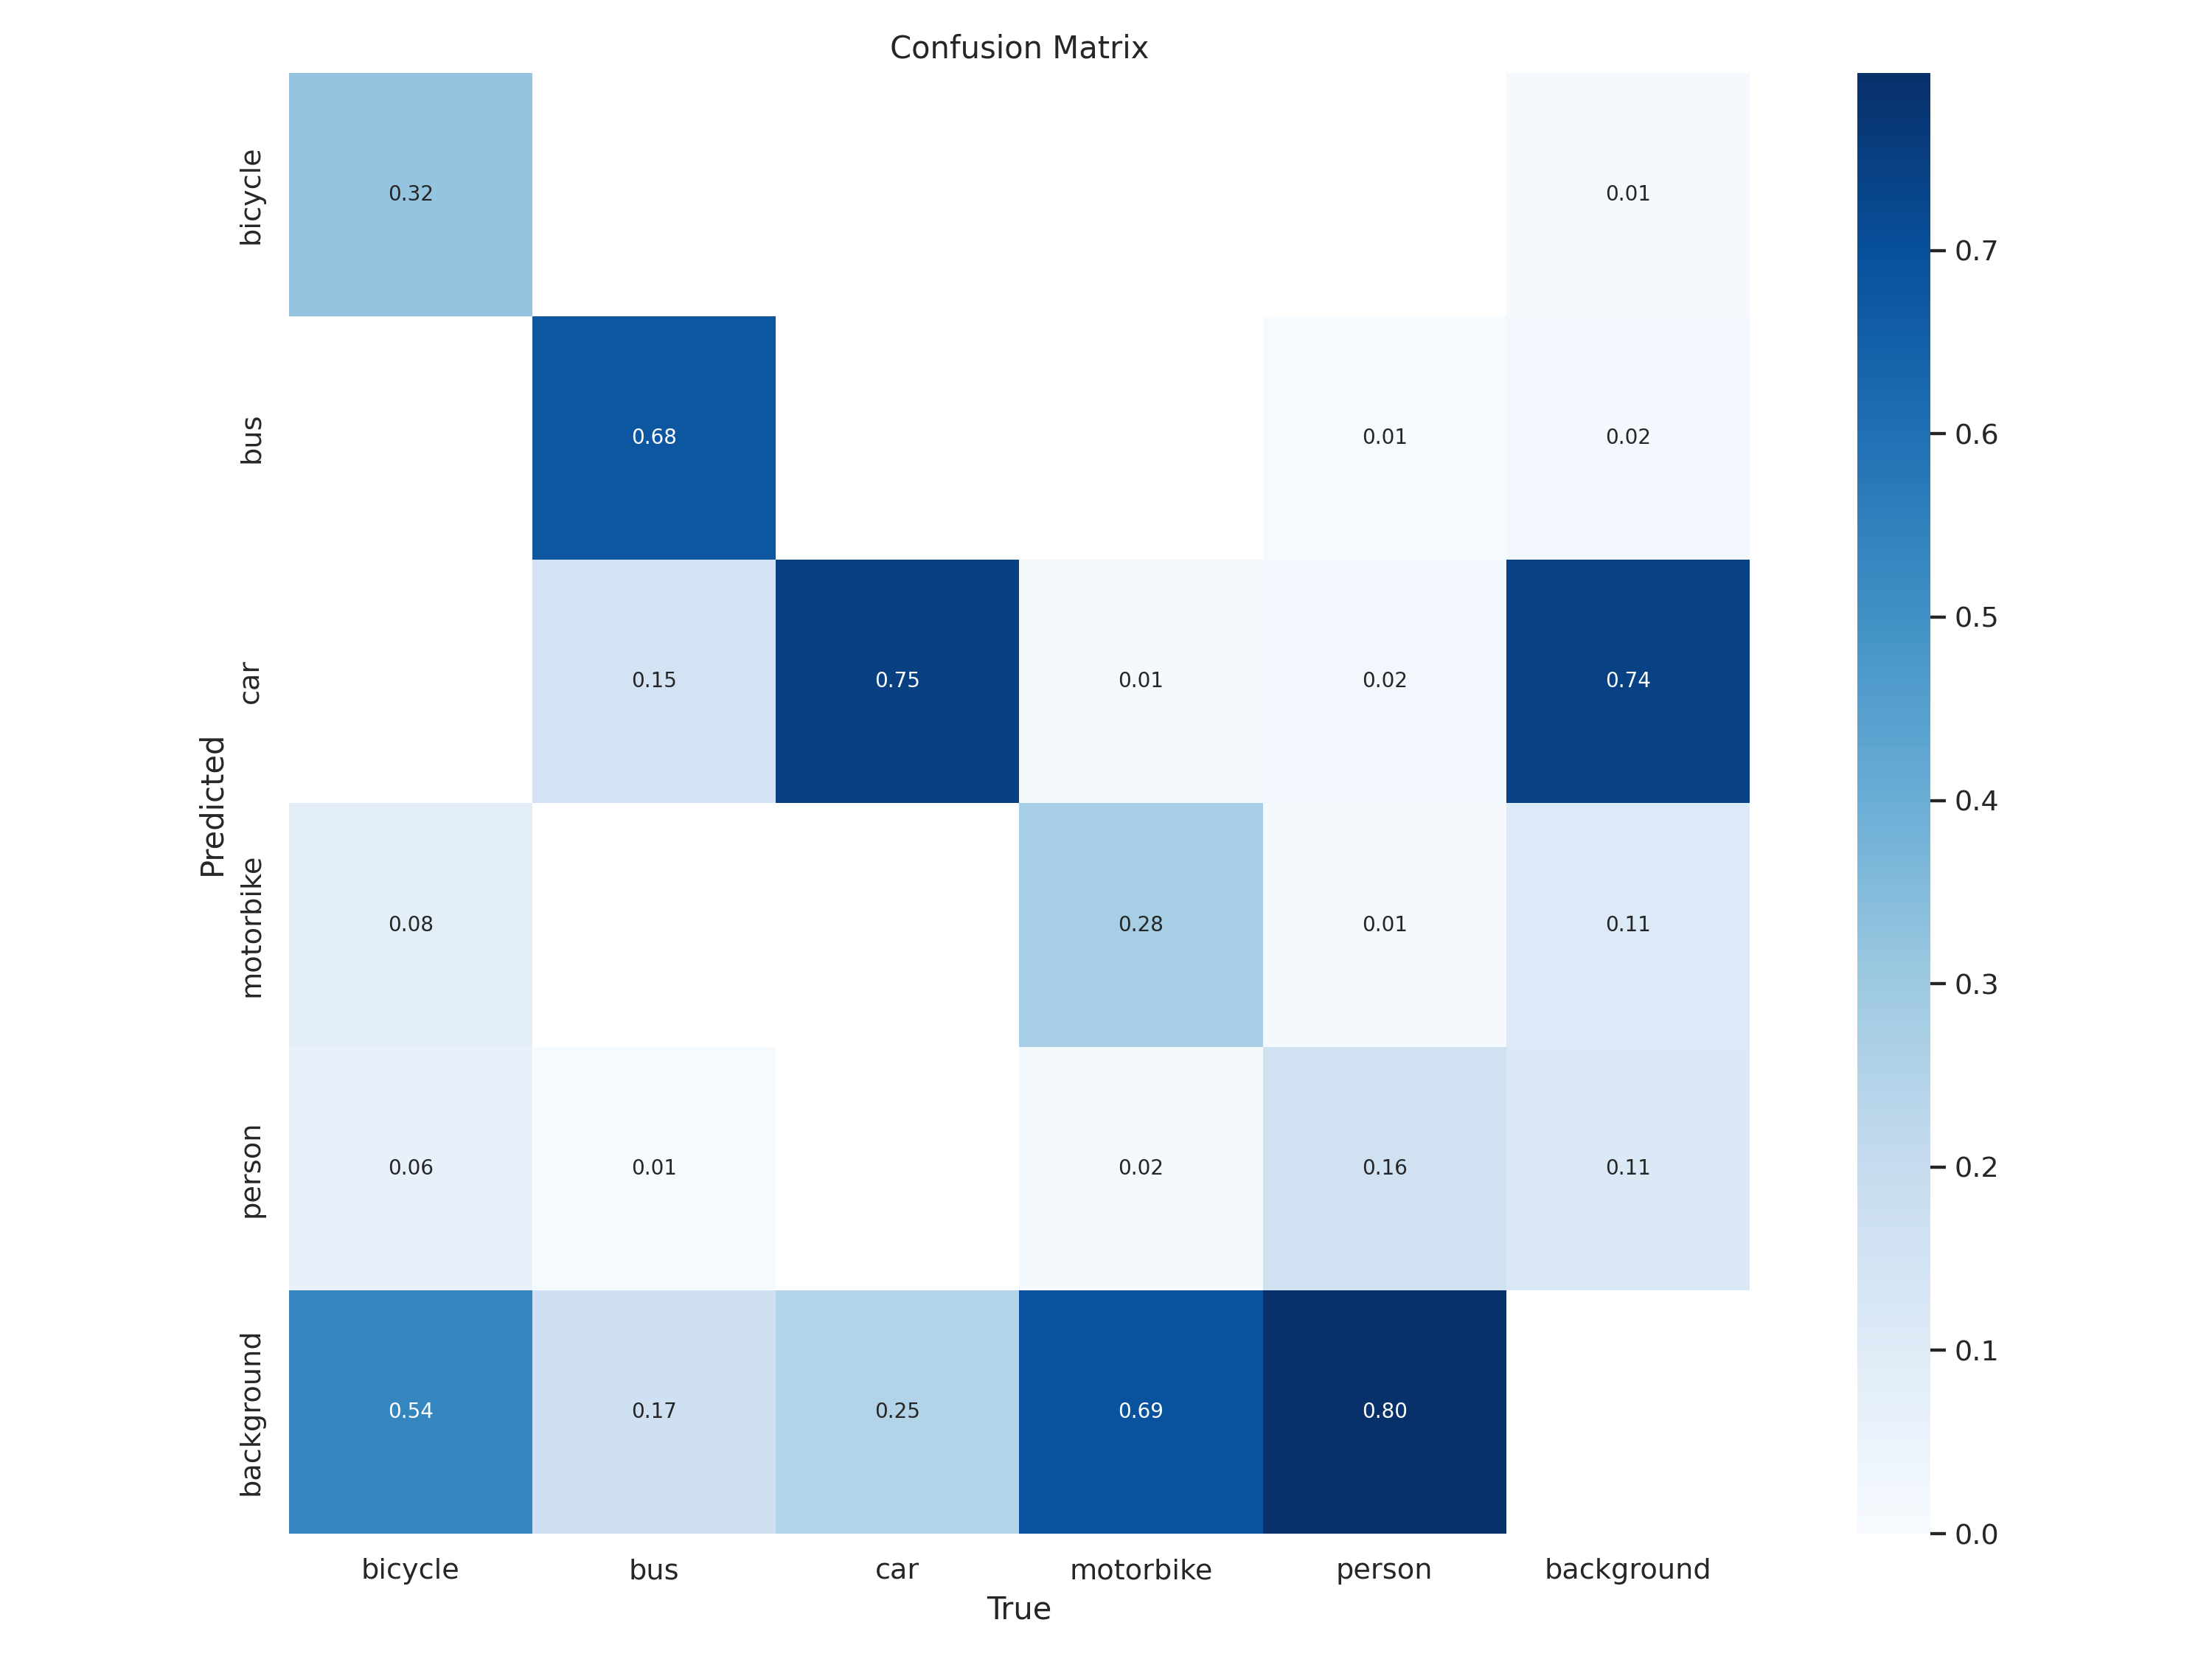

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

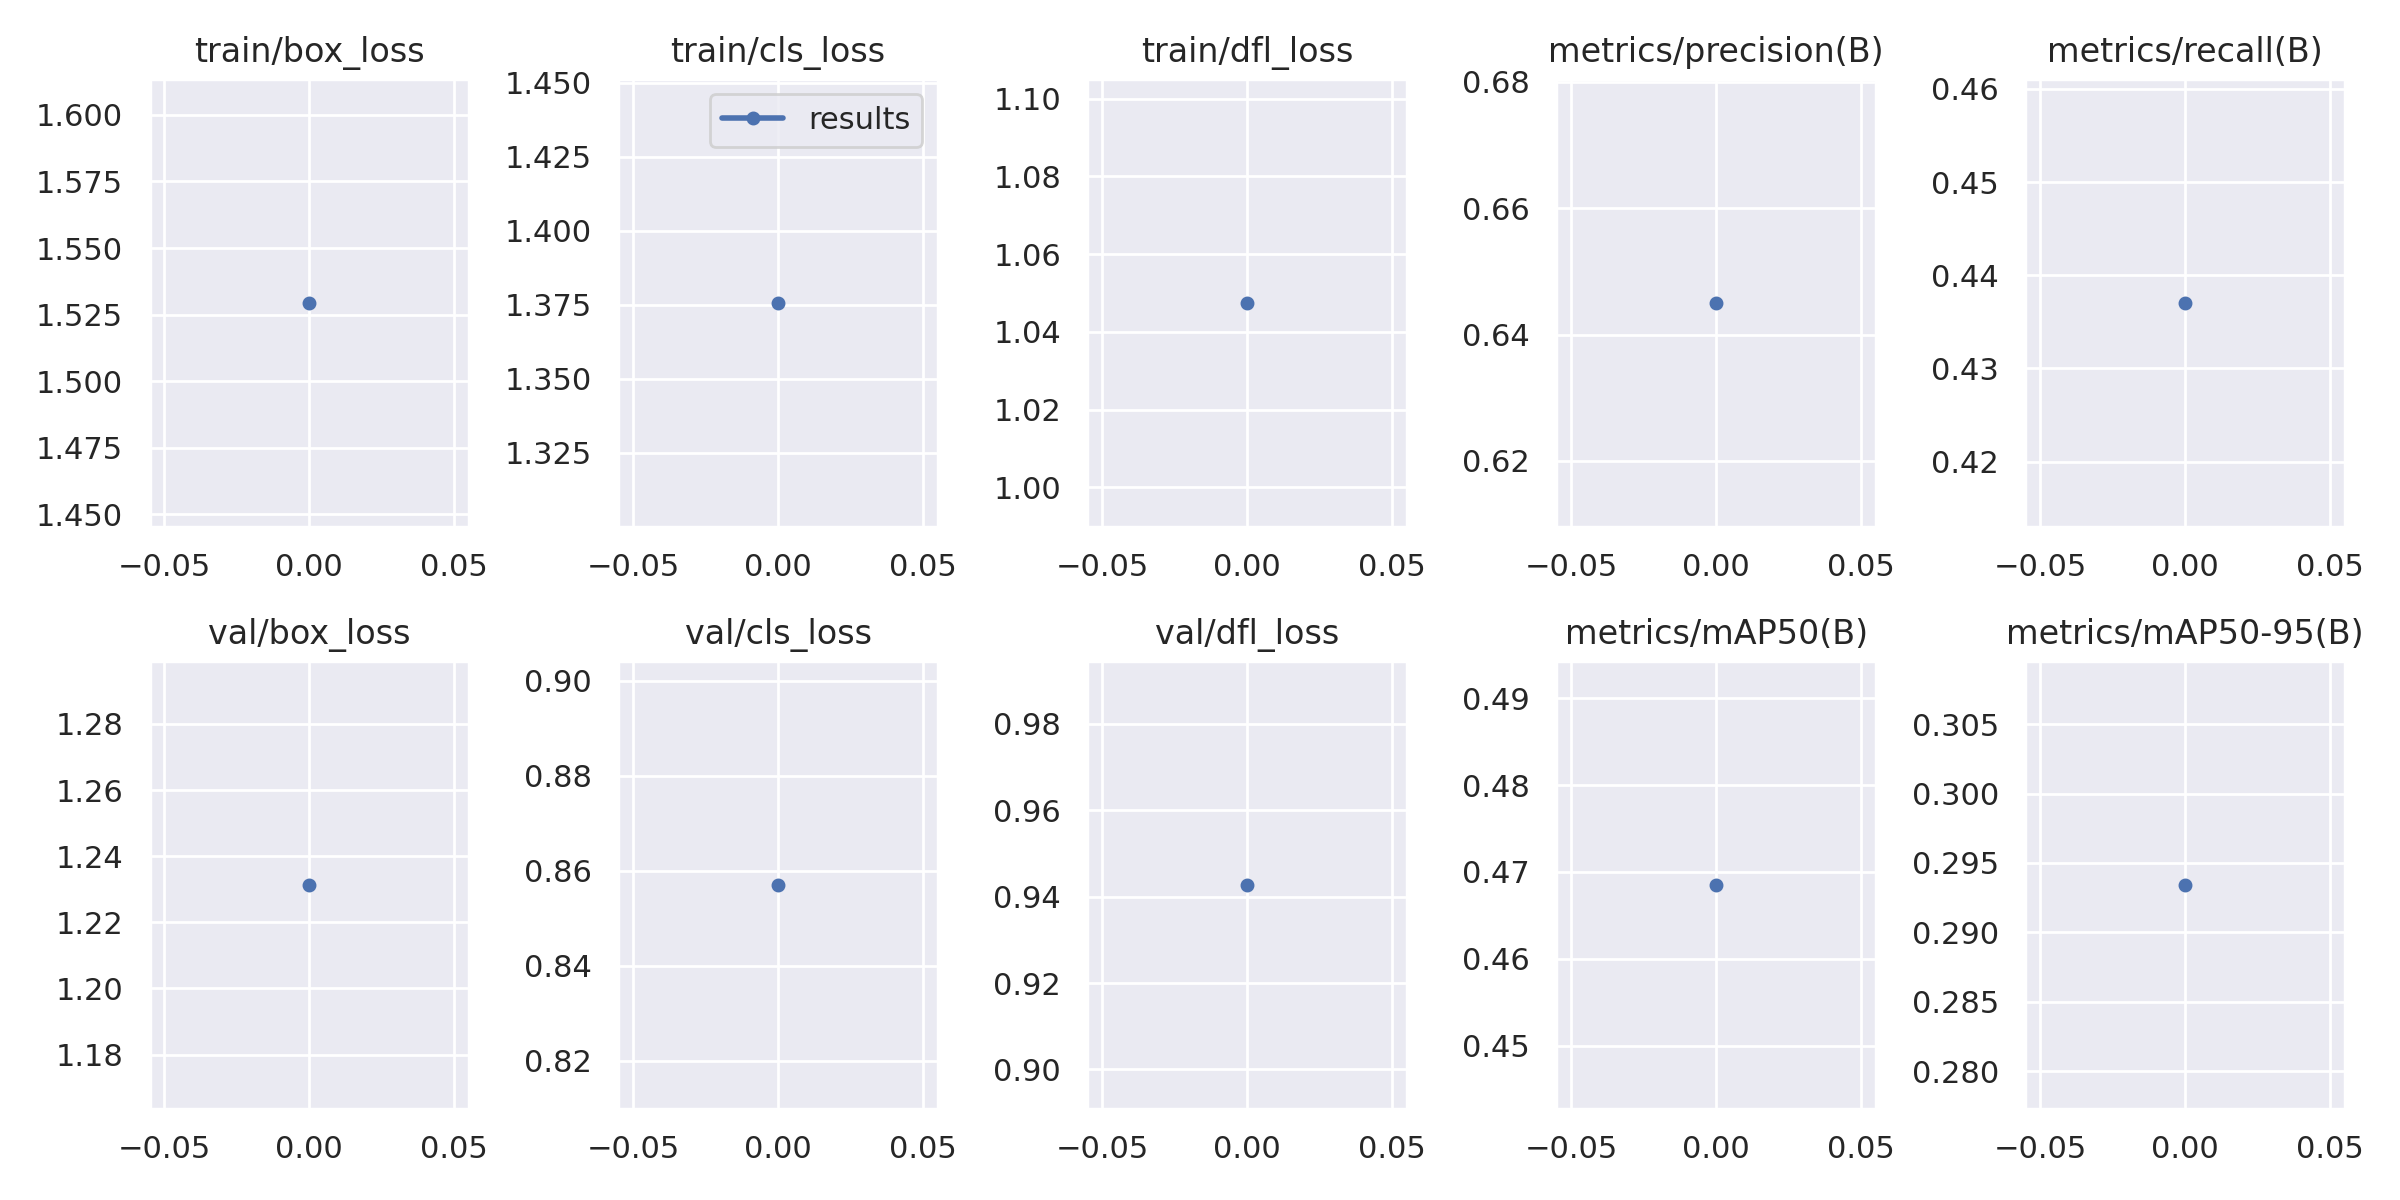

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

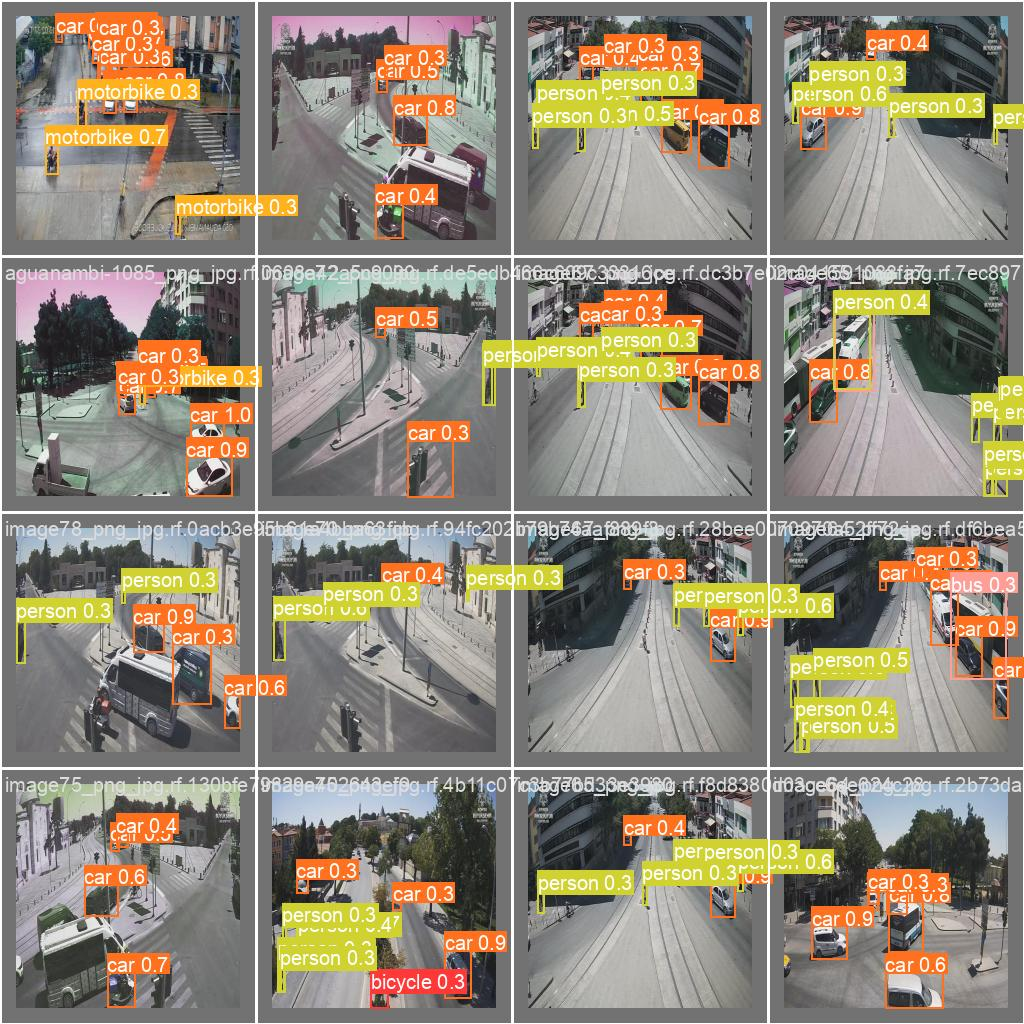

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

**Validating Custom Model**

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

2023-11-06 13:27:41.746725: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 13:27:43.452447: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100% 549/549 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 35/35 [01:32<00:00,  2.64s/it]
                   all        549       6270      0.647      0.438      0.469      0.294
               bicycle        549     

**Inference with Custom Model**

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source="/content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)/test/images"

2023-11-06 13:35:31.533142: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 13:35:32.888227: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/279 /content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 224x224 10 cars, 1 motorbike, 174.1ms
image 2/279 /content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 224x224 9 cars, 1 motorbike, 177.2ms
image 3/279 /content/drive/MyDrive/assignme

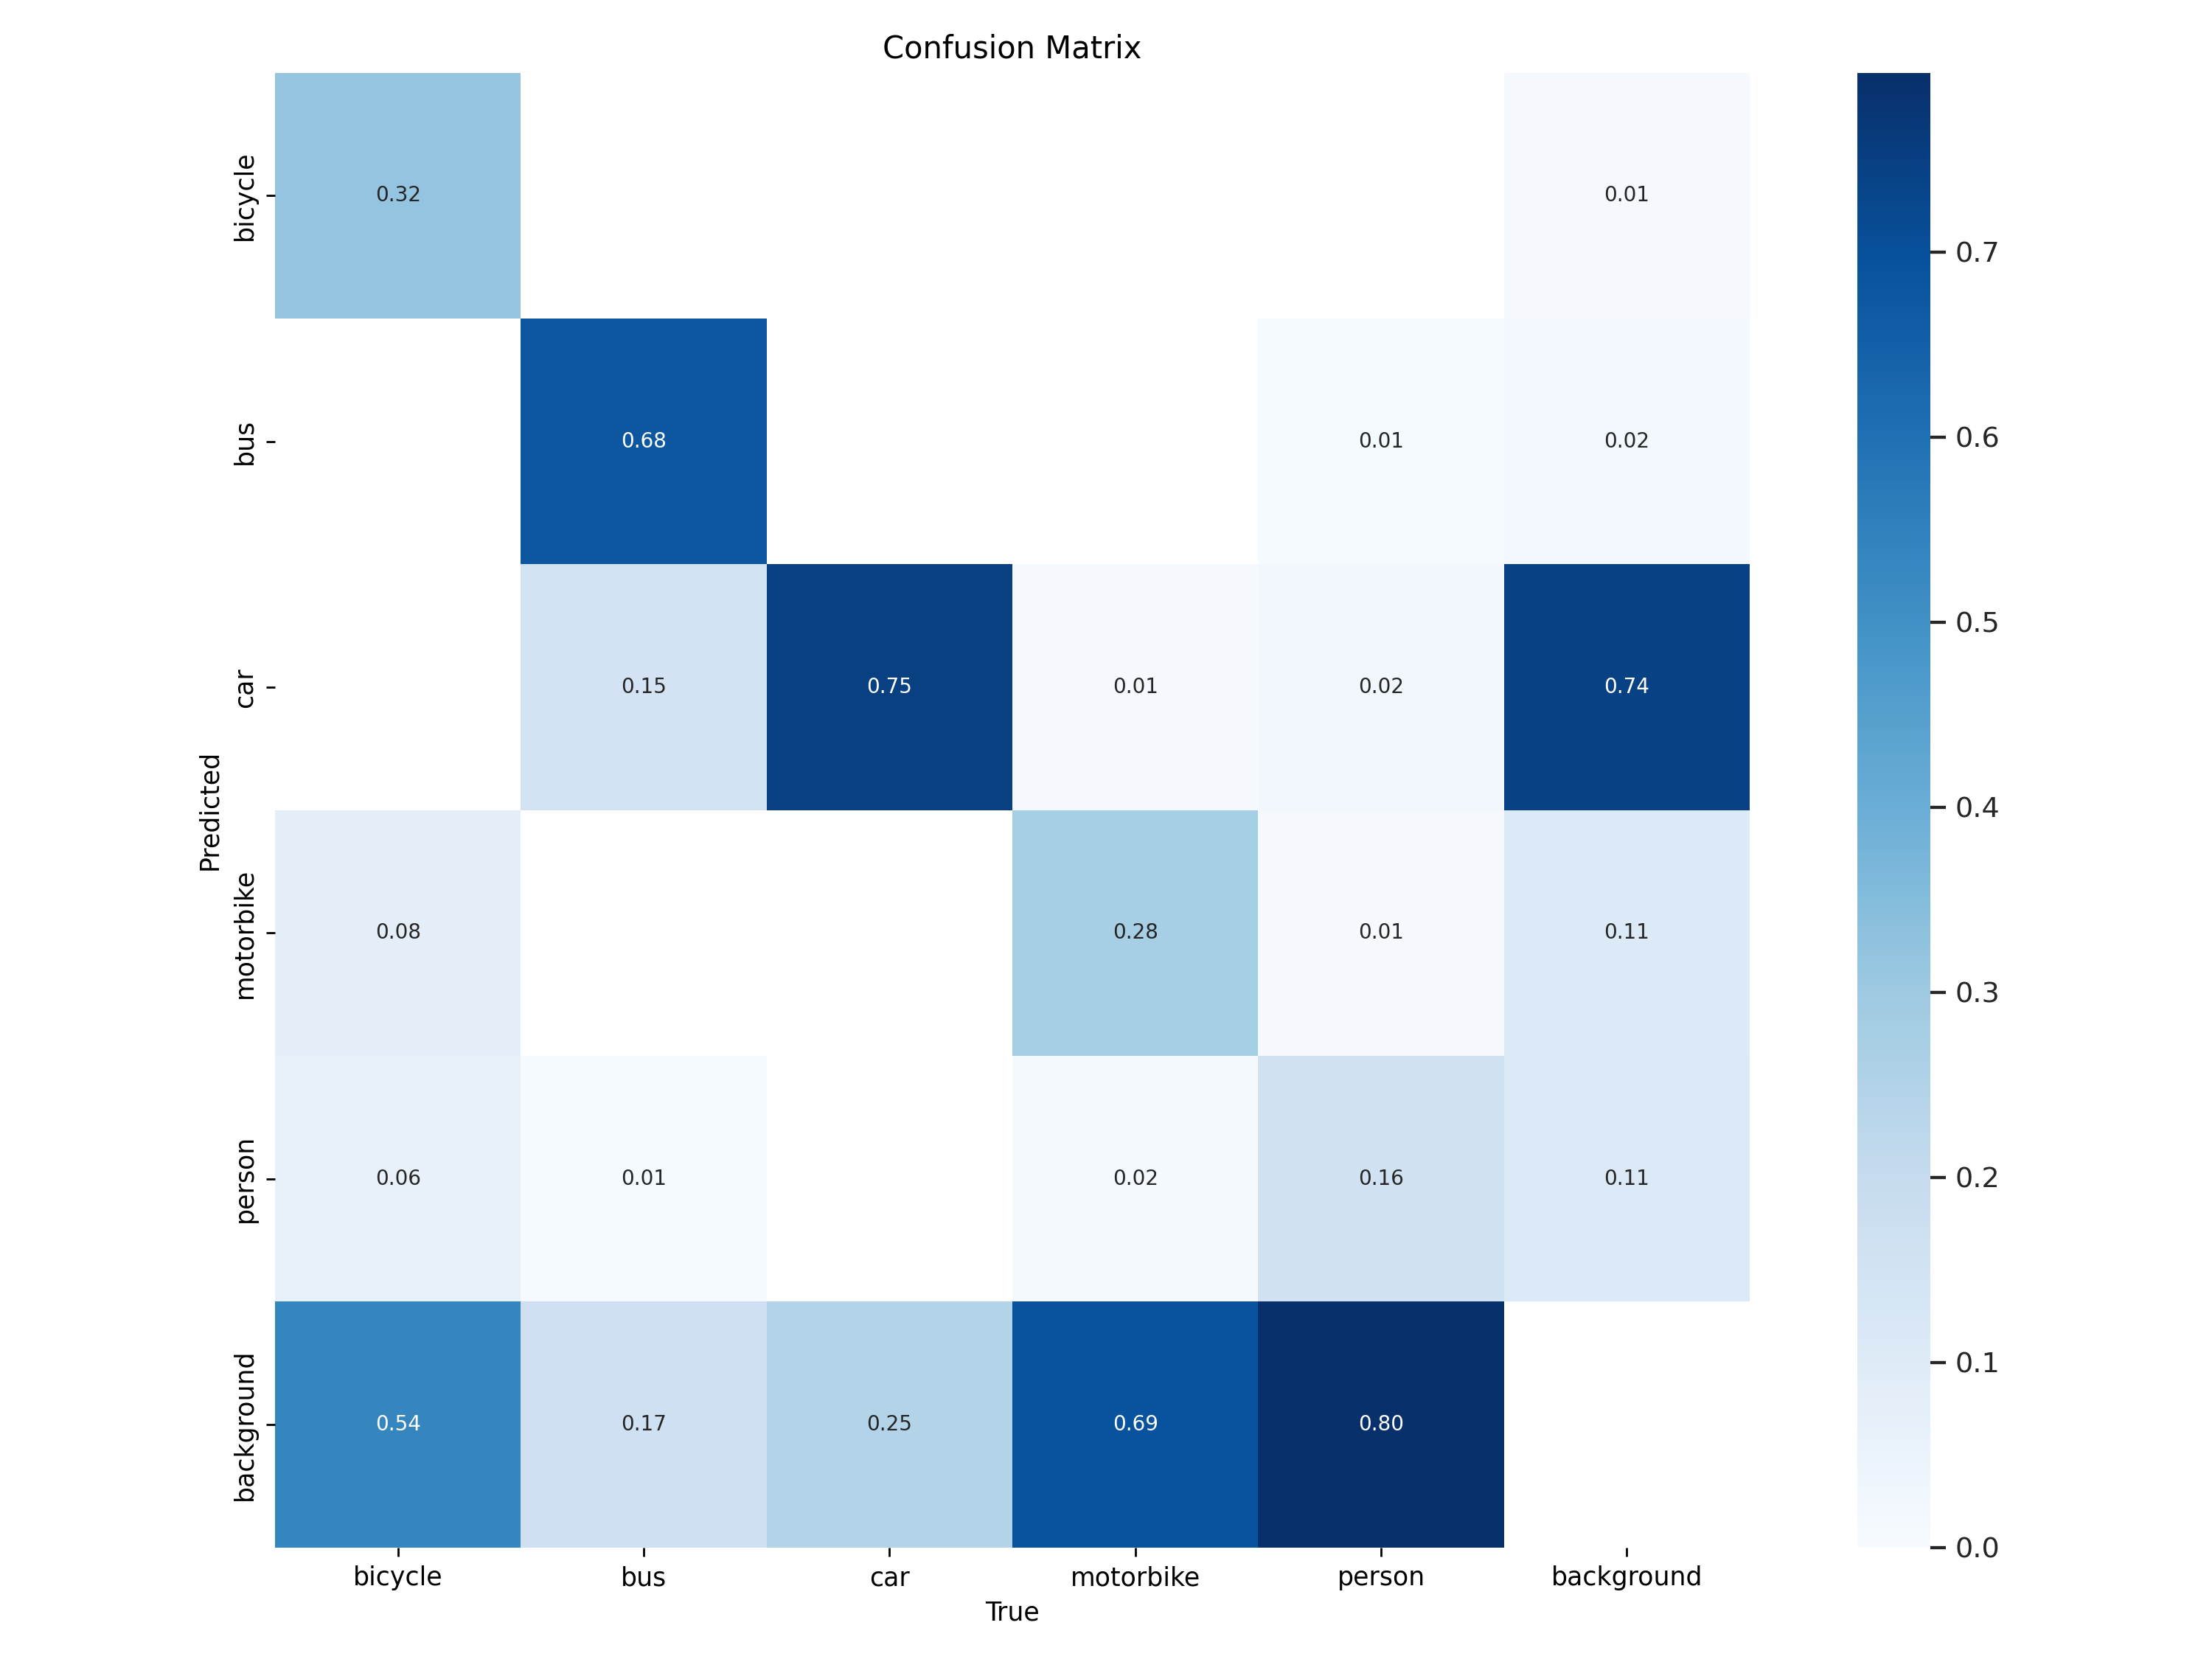

In [ ]:
Image(filename='/content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)/runs/detect/val/confusion_matrix.png', width=600)

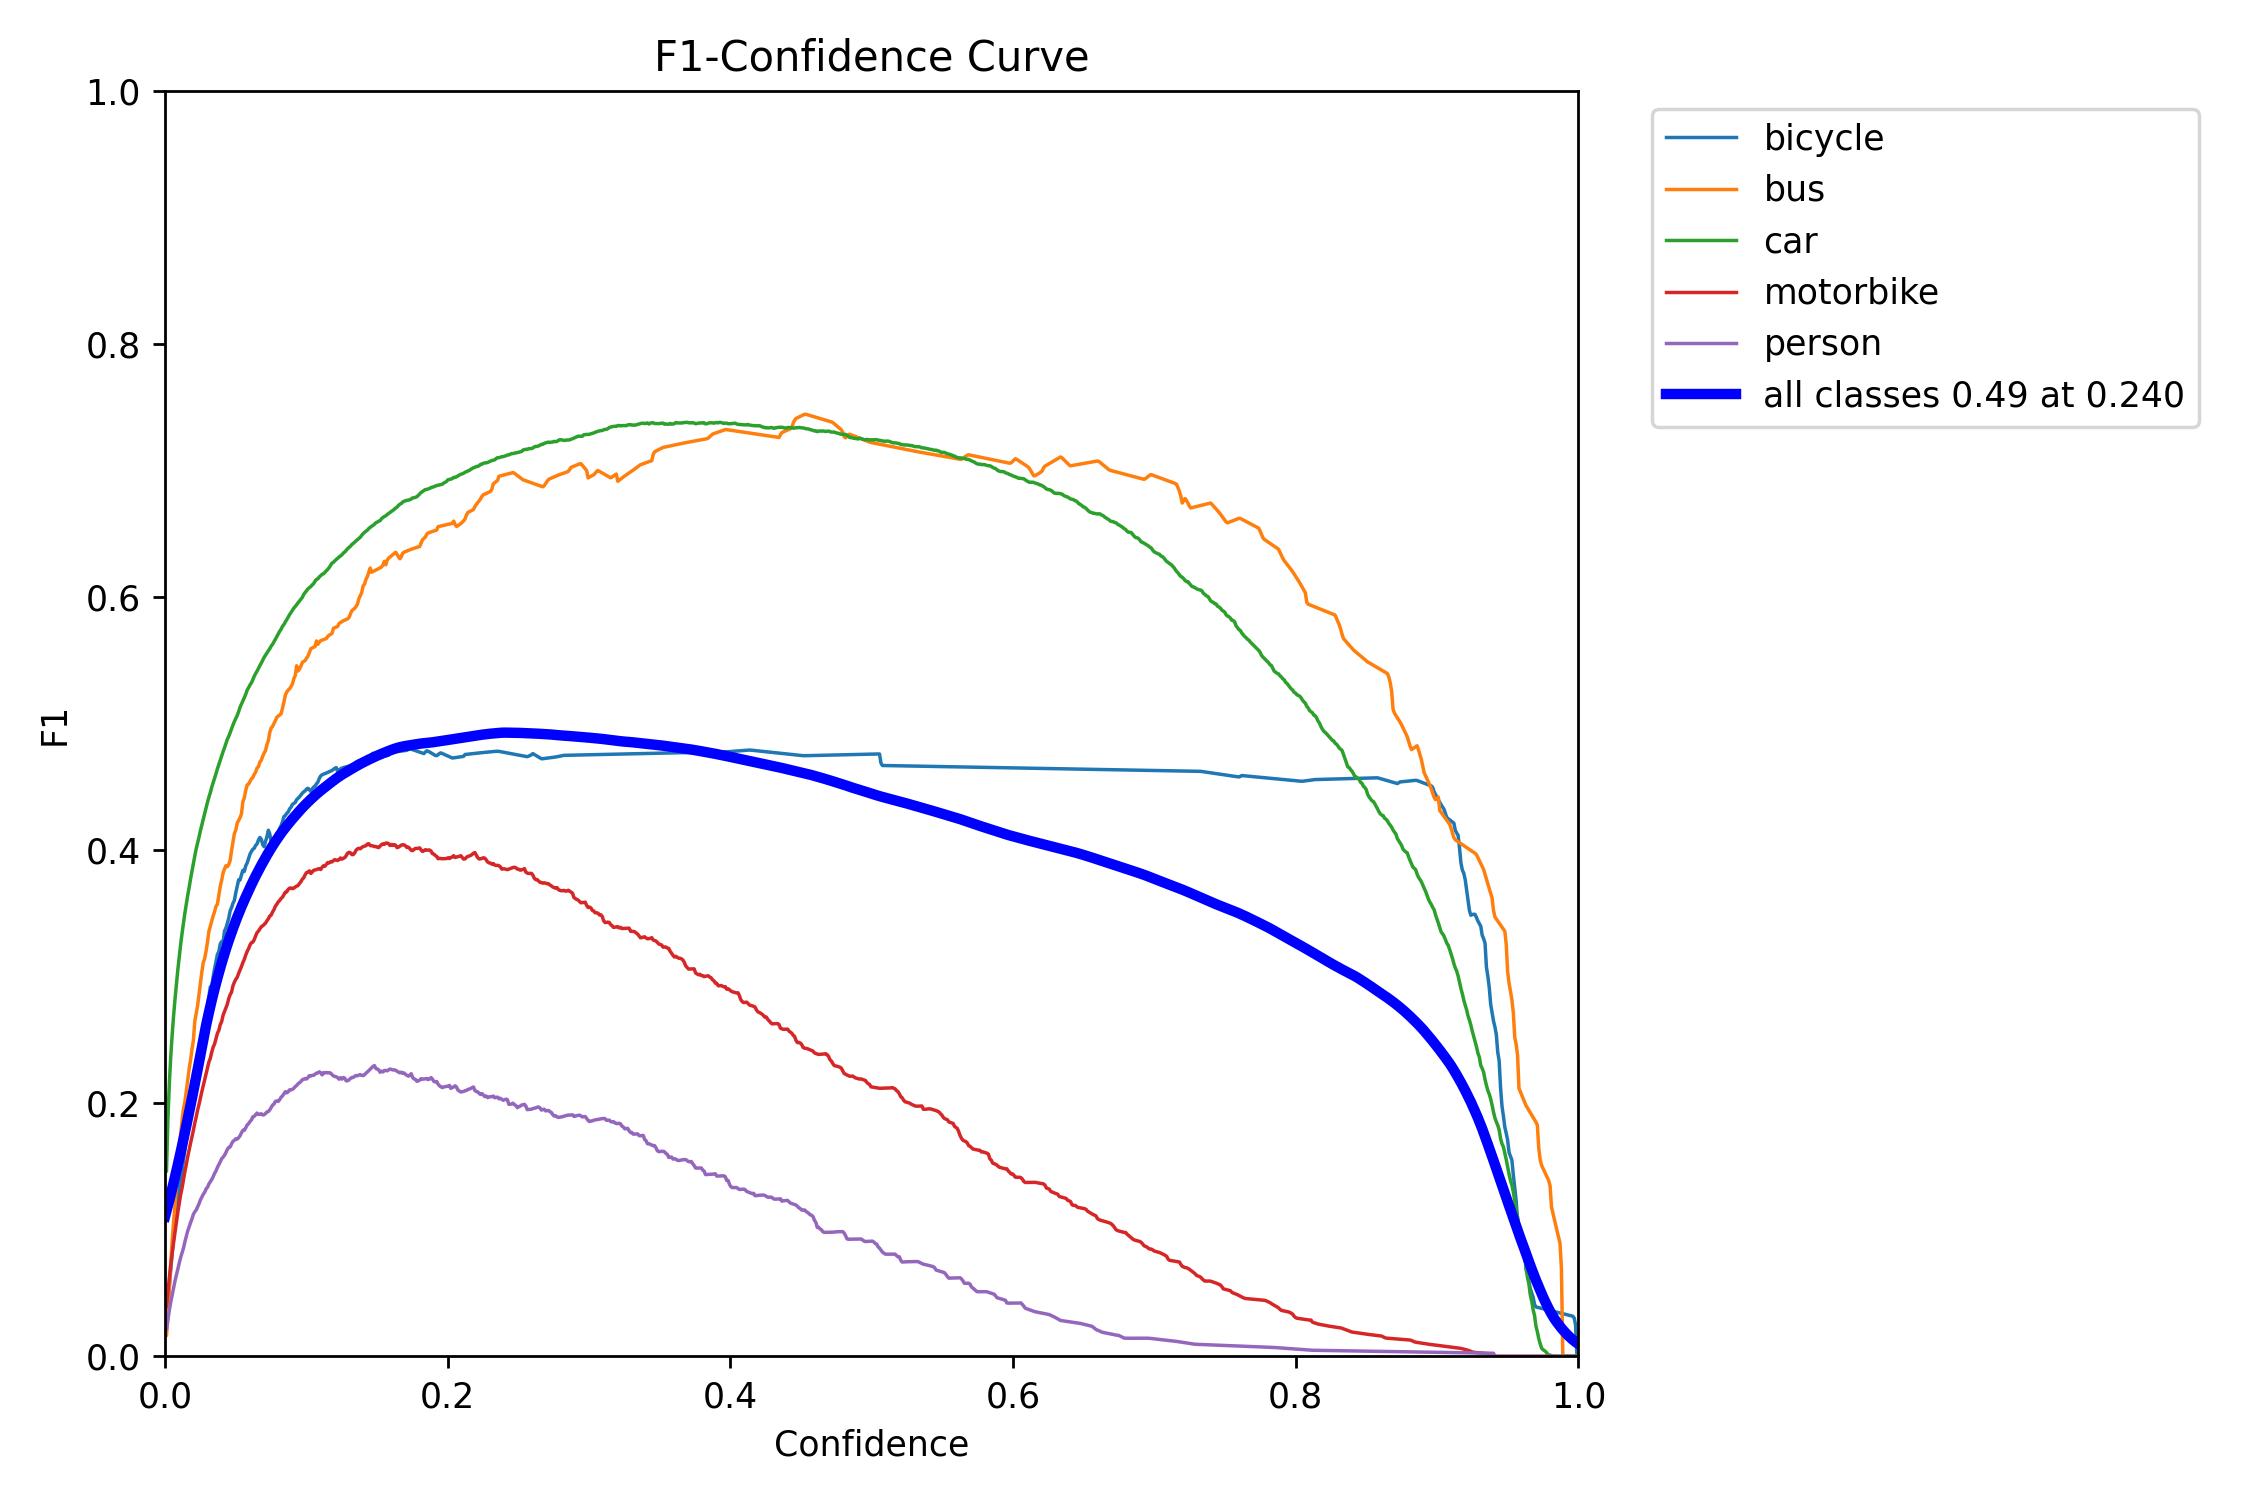

In [ ]:
Image(filename="/content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)/runs/detect/val/F1_curve.png",width=600)

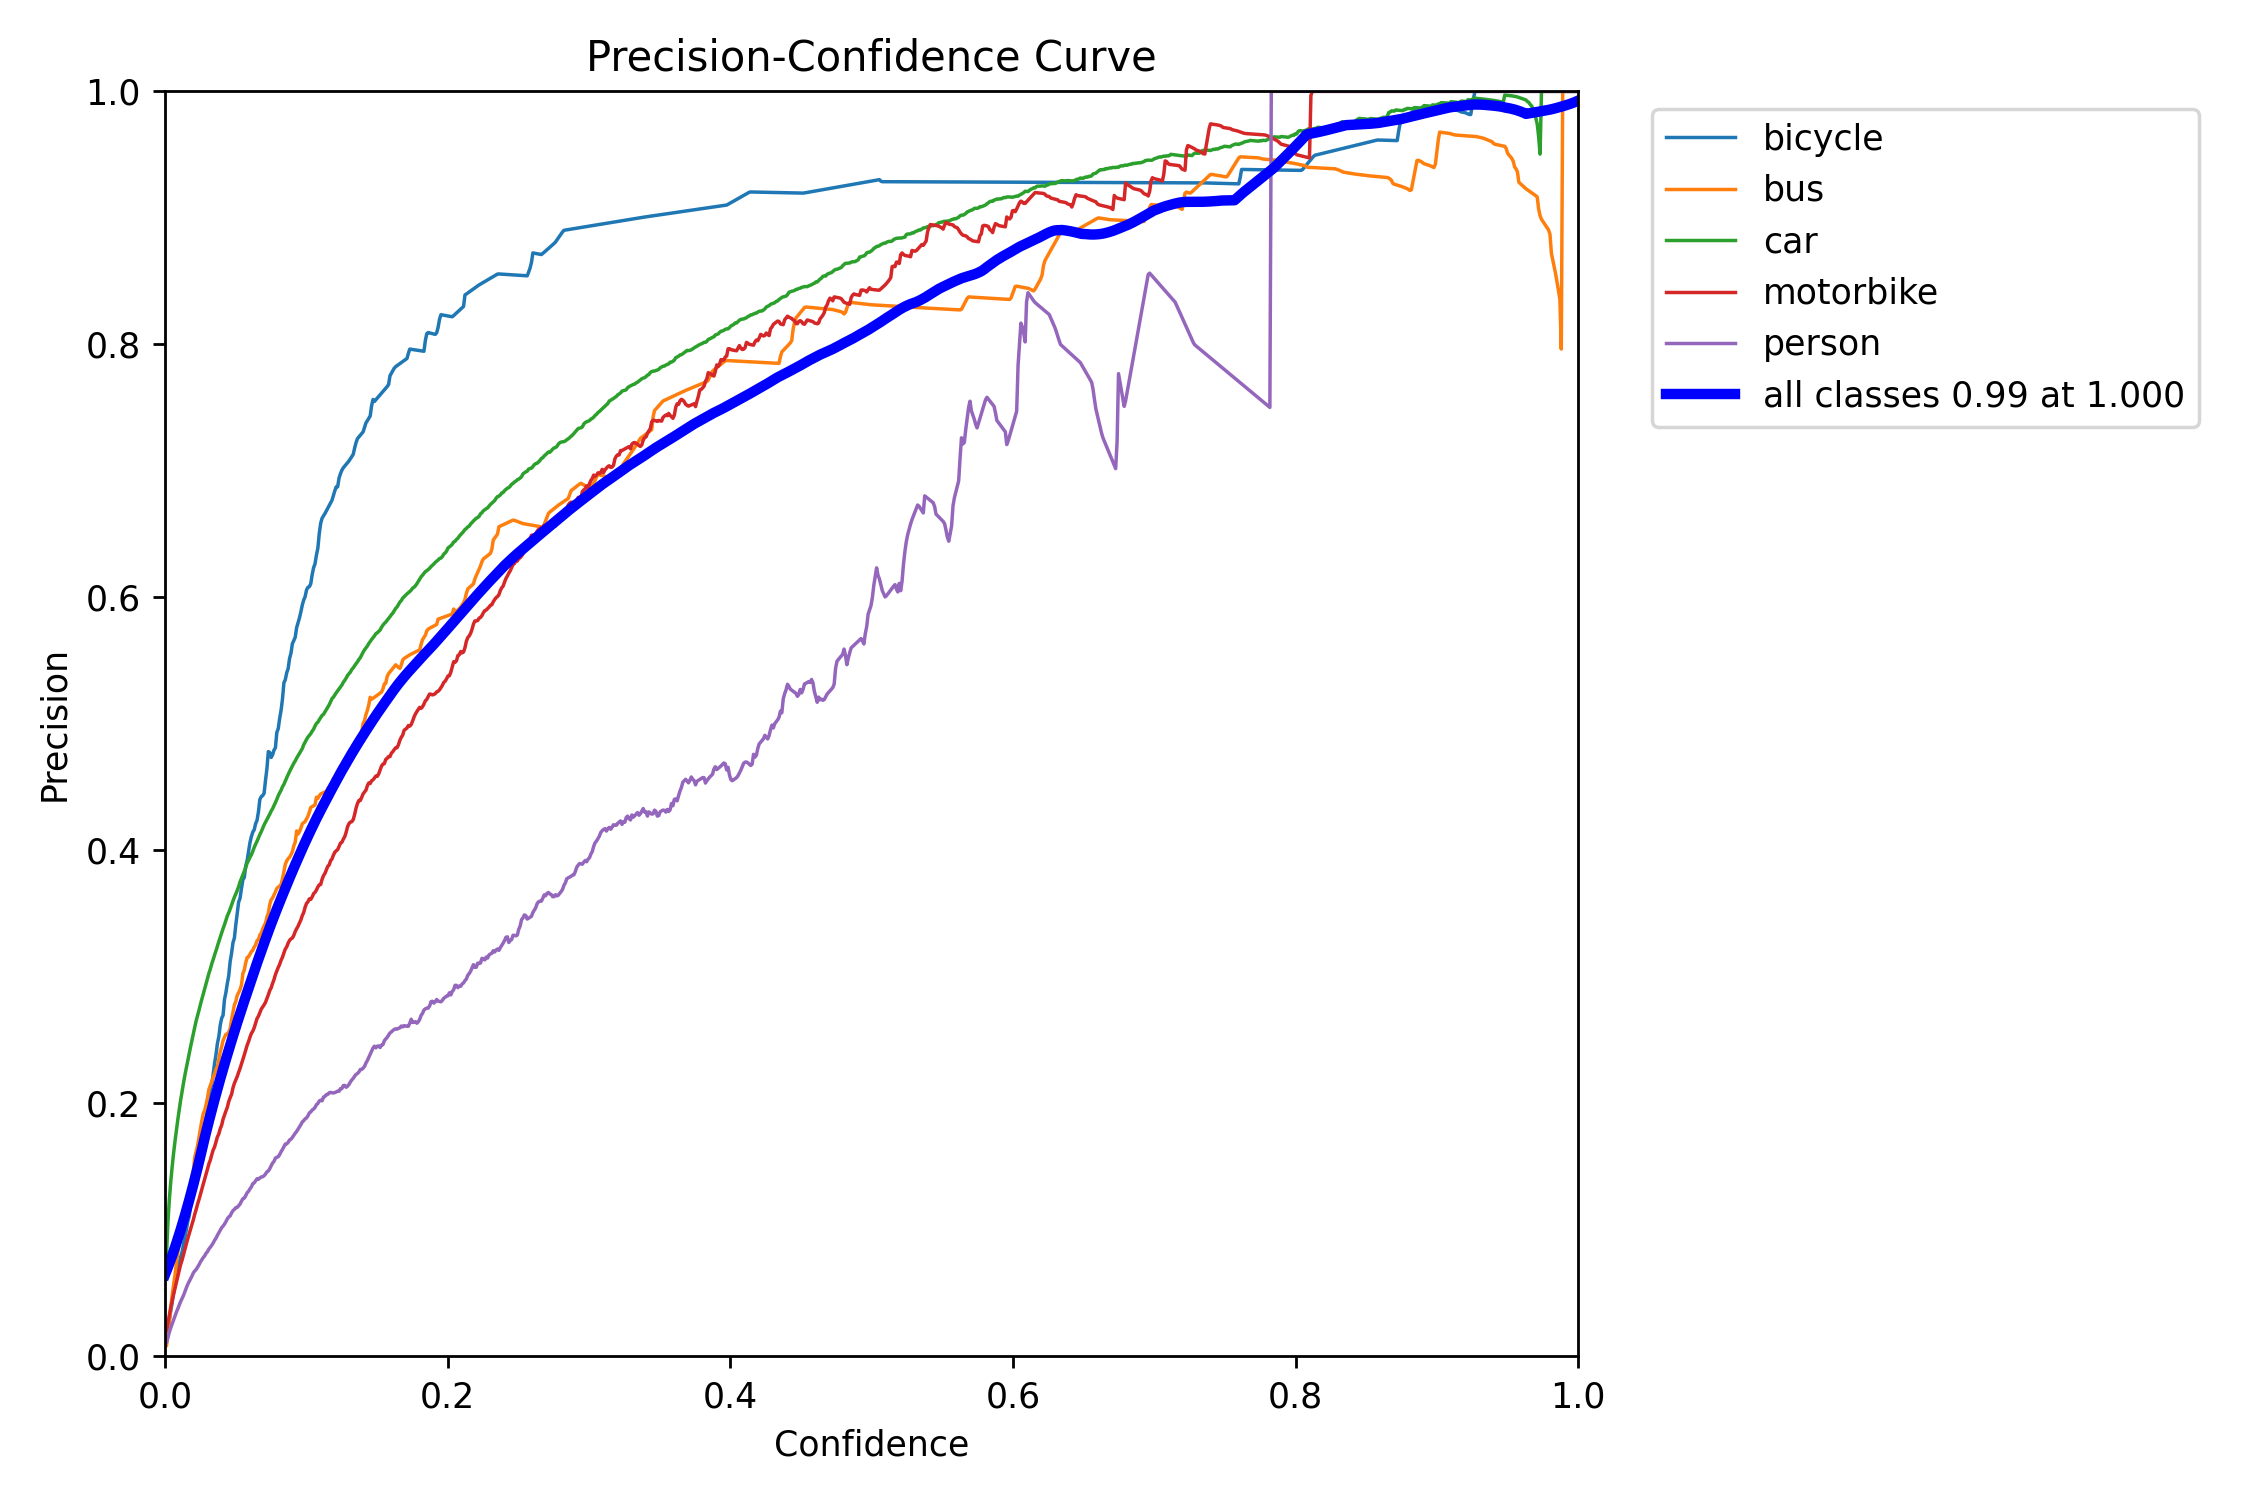

In [ ]:
Image(filename="/content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)/runs/detect/val/P_curve.png",width=600)

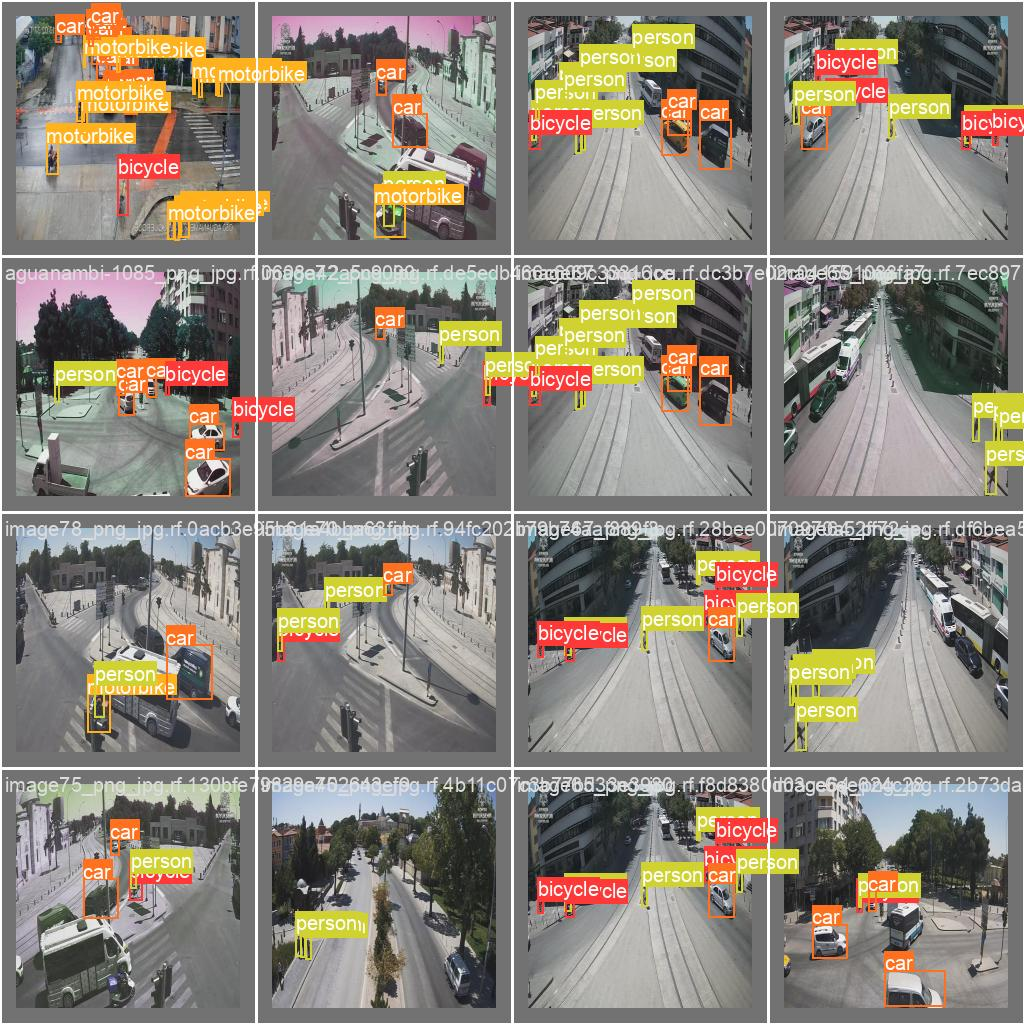

In [ ]:
Image(filename='/content/drive/MyDrive/assignment_dataset.zip (Unzipped Files)/runs/detect/val/val_batch0_labels.jpg', width=600)